In [1]:
# Import image class of matplotlib
import matplotlib.image as img
import pandas as pd


# Read batman image and print dimensions
batman_image = img.imread('Desktop/batman.jpg')
print(batman_image.shape)
r = []
b = []
g = []
# Store RGB values of all pixels in lists r, g and b
for row in batman_image:
    for temp_r, temp_g, temp_b in row:
        r.append(temp_r)
        g.append(temp_g)
        b.append(temp_b)

(169, 269, 3)


In [2]:
# Storing RGB values in a dataframe

batman_df = pd.DataFrame({'red':r,'green':g,'blue':b})
batman_df['scaled_red'] = batman_df['red'] / batman_df['red'].std()
batman_df['scaled_green'] = batman_df['green'] / batman_df['green'].std()
batman_df['scaled_blue'] = batman_df['blue'] / batman_df['blue'].std()

batman_df.head()

,red,green,blue,scaled_red,scaled_green,scaled_blue
0,36,28,25,0.450153,0.370098,0.279909
1,39,21,19,0.487665,0.277574,0.212731
2,52,20,21,0.650220,0.264356,0.235124
3,61,27,28,0.762758,0.356881,0.313498
4,37,15,18,0.462657,0.198267,0.201535


In [3]:
from scipy.cluster.vq import kmeans,vq
import seaborn as sns
import matplotlib.pyplot as plt

distortions = []
num_clusters = range(1, 7)

# Create a list of distortions from the kmeans function
for i in num_clusters:
    cluster_centers, distortion = kmeans(batman_df[['scaled_red','scaled_blue','scaled_green']],i)
    distortions.append(distortion)

# Create a data frame with two lists, num_clusters and distortions
elbow_plot = pd.DataFrame({'num_clusters':num_clusters,'distortions':distortions})

# Create a line plot of num_clusters and distortions
sns.lineplot(x='num_clusters', y='distortions', data = elbow_plot)
plt.xticks(num_clusters)
plt.show()

<Figure size 640x480 with 1 Axes>

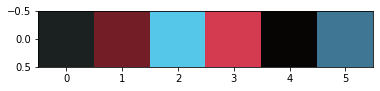

In [4]:
# Get standard deviations of each color
r_std, g_std, b_std = batman_df[['red', 'green', 'blue']].std()
colors = []
for cluster_center in cluster_centers:
    scaled_r, scaled_g, scaled_b = cluster_center
    # Convert each standardized value to scaled value
    colors.append((
        scaled_r * r_std / 255,
        scaled_g * g_std / 255,
        scaled_b * b_std / 255
    ))

# Display colors of cluster centers
plt.imshow([colors])
plt.show()

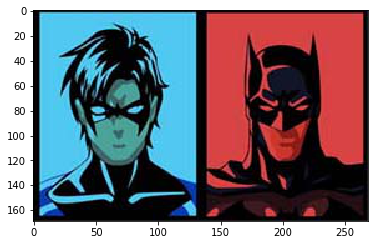

In [5]:
plt.imshow(batman_image)